Practice Activity 1

Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with lambda = 1

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [ ]:
# Read the data
ames = pd.read_csv("/content/AmesHousing (4).csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

In [ ]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]

In [ ]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

In [ ]:
ct.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('dummify',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b7579c089e0>),
                                ('standardize', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b7579b90f80>)])

In [ ]:
ct.transform(X)

,dummify__MS Zoning_C (all),dummify__MS Zoning_FV,dummify__MS Zoning_I (all),dummify__MS Zoning_RH,dummify__MS Zoning_RL,dummify__MS Zoning_RM,dummify__Street_Grvl,dummify__Street_Pave,dummify__Lot Shape_IR1,dummify__Lot Shape_IR2,...,standardize__Garage Area,standardize__Wood Deck SF,standardize__Open Porch SF,standardize__Enclosed Porch,standardize__3Ssn Porch,standardize__Screen Porch,standardize__Pool Area,standardize__Misc Val,standardize__Mo Sold,standardize__Yr Sold
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.246615,0.896016,0.207098,-0.356731,-0.103521,-0.288151,-0.061399,-0.087930,-0.444404,1.675421
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.189503,0.346175,-0.713033,-0.356731,-0.103521,1.842908,-0.061399,-0.087930,-0.076545,1.675421
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,-0.761621,2.333460,-0.178763,-0.356731,-0.103521,-0.288151,-0.061399,21.738194,-0.076545,1.675421
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.218609,-0.753509,-0.713033,-0.356731,-0.103521,-0.288151,-0.061399,-0.087930,-0.812263,1.675421
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.031898,0.911726,-0.208445,-0.356731,-0.103521,-0.288151,-0.061399,-0.087930,-1.180122,1.675421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.526681,0.189077,-0.713033,-0.356731,-0.103521,-0.288151,-0.061399,-0.087930,-1.180122,-1.358188
2926,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.041234,0.534692,-0.713033,-0.356731,-0.103521,-0.288151,-0.061399,-0.087930,-0.076545,-1.358188
2927,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-2.217962,-0.125118,-0.238126,-0.356731,-0.103521,-0.288151,-0.061399,1.134333,0.291314,-1.358188
2928,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.266838,1.131663,-0.149082,-0.356731,-0.103521,-0.288151,-0.061399,-0.087930,-0.812263,-1.358188


In [ ]:
# fit the linear regression
lr_pipeline_1 = Pipeline(
    [("preprocessing", ct),
     ("linear_regression", LinearRegression())]
)

In [ ]:
cross_val_score(lr_pipeline_1, X, y, cv=5, scoring='r2')

array([0.89727873, 0.91038253, 0.78900365, 0.77208628, 0.9006982 ])

In [ ]:
lr_pipeline_1_fitted = lr_pipeline_1.fit(X, y)
lr_pipeline_1_fitted

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b7579c089e0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b7579b90f80>)])),
                ('linear_regression', LinearRegression())])

In [ ]:
# fit the ridge regression
ridge_pipeline = Pipeline(
    [("preprocessing", ct),
     ("ridge_regression", Ridge(alpha=1))]
)

In [ ]:
cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')

array([0.89815807, 0.91744024, 0.79493606, 0.78522563, 0.91389818])

In [ ]:
ridge_pipeline_fitted = ridge_pipeline.fit(X, y)
ridge_pipeline_fitted

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b75ad2a8770>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b75821bdb80>)])),
                ('ridge_regression', Ridge(alpha=1))])

In [ ]:
coef_compare = pd.DataFrame()
coef_compare["lr"] = lr_pipeline_1.named_steps['linear_regression'].coef_
coef_compare['ridge'] = ridge_pipeline_fitted.named_steps['ridge_regression'].coef_

In [ ]:
# compare results to ordinary linear regression
coef_compare["diff"] = coef_compare["lr"] - coef_compare["ridge"]
coef_compare.sort_values(by="diff")

,lr,ridge,diff
91,-559653.342134,-233156.089658,-326497.252476
68,-113384.181772,-77996.160321,-35388.021451
106,-33825.937758,-16633.220977,-17192.716782
85,-20968.886474,-6399.635769,-14569.250704
124,-17416.886121,-6826.403541,-10590.482579
...,...,...,...
95,55399.766568,16828.505080,38571.261487
69,64910.291903,24567.527777,40342.764126
37,127054.304996,66530.685838,60523.619159
94,109059.255835,28387.663156,80671.592679


In [ ]:
from sklearn.model_selection import GridSearchCV

ridge_pipeline_1 = Pipeline(
    [("preprocessing", ct),
     ("ridge_regression", Ridge())]
).set_output(transform="pandas")

alphas = {'ridge_regression__alpha': np.array([.001, .01, .1, 1, 10, 100])}
gscv = GridSearchCV(ridge_pipeline_1, param_grid=alphas, cv=5, scoring='r2')
gscv_fitted = gscv.fit(X, y)
display(gscv_fitted.cv_results_)

{'mean_fit_time': array([0.16375866, 0.14161735, 0.19152446, 0.24866939, 0.29116106,
        0.1399754 ]),
 'std_fit_time': array([0.04699832, 0.01912782, 0.01942644, 0.06130952, 0.04244537,
        0.04509786]),
 'mean_score_time': array([0.06252923, 0.07018275, 0.08041701, 0.12419038, 0.11840262,
        0.0565506 ]),
 'std_score_time': array([0.01766386, 0.02007759, 0.02299862, 0.02317715, 0.0113207 ,
        0.01930325]),
 'param_ridge_regression__alpha': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'ridge_regression__alpha': np.float64(0.001)},
  {'ridge_regression__alpha': np.float64(0.01)},
  {'ridge_regression__alpha': np.float64(0.1)},
  {'ridge_regression__alpha': np.float64(1.0)},
  {'ridge_regression__alpha': np.float64(10.0)},
  {'ridge_regression__alpha': np.float64(100.0)}],
 'split0_test_score': array([0.8972854 , 0.89734306, 0.89774358, 0.89815807, 0.897762

<Axes: xlabel='lr', ylabel='ridge'>

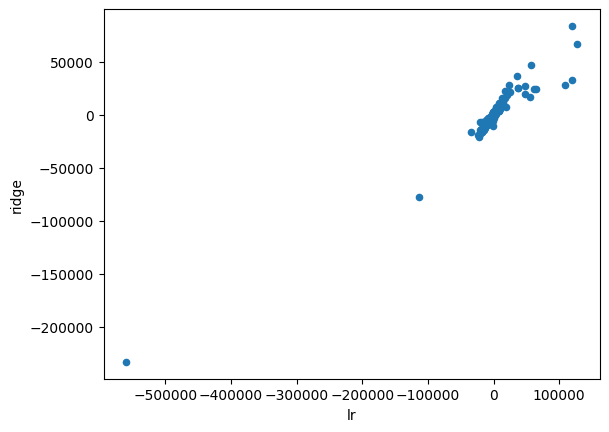

In [ ]:
coef_compare.plot.scatter(x='lr', y='ridge')


In [ ]:
# create a LASSO pipeline, and tune lambda
# Fit your best model on the full AMES data, and compare the coefficients to Ridge and OLS
lasso_pipeline = Pipeline(
    [("preprocessing", ct),
     ("lasso_regression", Lasso(alpha=1))]
)

In [ ]:
cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+10, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


array([0.89774385, 0.91093785, 0.79691806, 0.77426245, 0.90589888])

In [ ]:
lasso_pipeline_fitted = lasso_pipeline.fit(X,y)
lasso_pipeline_fitted

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b7579c089e0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b7579b90f80>)])),
                ('lasso_regression', Lasso(alpha=1))])

In [ ]:
coef_compare["lasso"] = lasso_pipeline_fitted.named_steps['lasso_regression'].coef_
coef_compare['lasso_diff'] = coef_compare['ridge'] - coef_compare['lasso']

In [ ]:
coef_compare.sort_values(by='lasso_diff')

,lr,ridge,diff,lasso,lasso_diff
37,127054.304996,66530.685838,60523.619159,132015.733845,-65485.048008
109,37584.951869,25708.646790,11876.305079,76167.305679,-50458.658888
69,64910.291903,24567.527777,40342.764126,60878.855589,-36311.327812
93,119504.966230,32582.552859,86922.413371,54108.861642,-21526.308783
191,19582.112743,7495.507740,12086.605003,26430.977114,-18935.469375
...,...,...,...,...,...
126,37584.951869,25708.646790,11876.305079,623.765038,25084.881752
97,47803.911563,19929.205625,27874.705939,-11656.796622,31586.002247
68,-113384.181772,-77996.160321,-35388.021451,-111624.851127,33628.690806
92,47815.565877,26802.263636,21013.302241,-11572.161484,38374.425120


<Axes: xlabel='ridge', ylabel='lasso'>

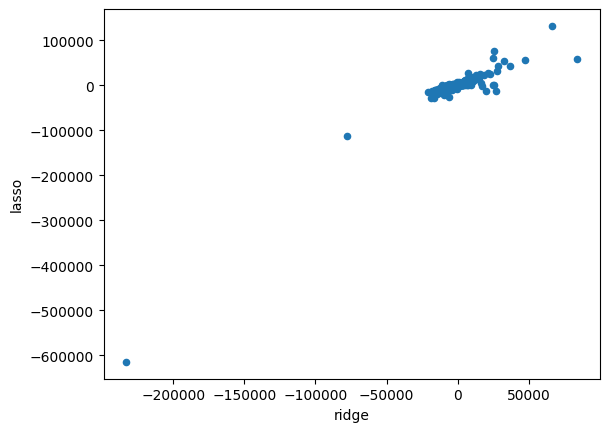

In [ ]:
coef_compare.plot.scatter(x='ridge', y='lasso')

In [ ]:
lasso_pipeline_1 = Pipeline(
    [('preprocessing', ct),
     ('lasso_regression', Lasso())]
).set_output(transform='pandas')

alphas = {'lasso_regression__alpha': np.array([100, 10, 1, 0.1, 0.01])}
gscv = GridSearchCV(lasso_pipeline_1, param_grid=alphas, cv=5, scoring='r2')

In [ ]:
gscv_fitted = gscv.fit(X,y)
gscv_fitted.cv_results_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+10, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.236e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+11, tolerance: 1.474e

{'mean_fit_time': array([0.40139451, 0.71024499, 2.09151268, 2.58159127, 2.93801455]),
 'std_fit_time': array([0.06040713, 0.36998923, 0.53071445, 0.86580273, 0.72285388]),
 'mean_score_time': array([0.07270784, 0.07161121, 0.06407185, 0.0696146 , 0.07361135]),
 'std_score_time': array([0.0254371 , 0.02595391, 0.03473434, 0.02501026, 0.02674645]),
 'param_lasso_regression__alpha': masked_array(data=[100.0, 10.0, 1.0, 0.1, 0.01],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'lasso_regression__alpha': np.float64(100.0)},
  {'lasso_regression__alpha': np.float64(10.0)},
  {'lasso_regression__alpha': np.float64(1.0)},
  {'lasso_regression__alpha': np.float64(0.1)},
  {'lasso_regression__alpha': np.float64(0.01)}],
 'split0_test_score': array([0.90180018, 0.90077569, 0.89774385, 0.89725821, 0.89720561]),
 'split1_test_score': array([0.92443329, 0.91506699, 0.91093785, 0.91045103, 0.91040134]),
 'split2_test_score': array([0.80538971, 0.8014

In [ ]:
# create an elastic net pipeline and tune lambda and alpha
# fit your best model on the full ames data, and compare the coefficients to Ridge and OLS

from sklearn.model_selection import GridSearchCV
elastic_pipeline_1 = Pipeline(
    [("preprocessing", ct),
     ("elastic_net", ElasticNet())]
).set_output(transform="pandas")

param_grid = {
    "elastic_net__alpha": [1,10,100],
    "elastic_net__l1_ratio": np.arange(0.0, 1.2, 0.2)
}
gscv = GridSearchCV(elastic_pipeline_1, param_grid=param_grid, cv=5, scoring='r2')

In [ ]:
gscv_fitted = gscv.fit(X,y)
gscv_fitted.cv_results_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+12, tolerance: 1.348e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.089e+12, tolerance: 1.474e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

{'mean_fit_time': array([3.42220364, 0.27460289, 0.21480312, 0.21069226, 0.29209232,
        2.72812395, 3.29640222, 0.15772152, 0.34356151, 0.17528014,
        0.1513576 , 0.74511242, 3.43039827, 0.15041952, 0.22287641,
        0.18444881, 0.12534966, 0.44294925]),
 'std_fit_time': array([0.61155173, 0.05378518, 0.03860715, 0.03569572, 0.03819036,
        0.80719022, 0.76489937, 0.05670829, 0.12368319, 0.0162683 ,
        0.02675537, 0.37464159, 0.6729911 , 0.04590496, 0.03512918,
        0.03764724, 0.00919275, 0.07450052]),
 'mean_score_time': array([0.08217459, 0.08053436, 0.06559005, 0.08486066, 0.08035026,
        0.07495041, 0.12269559, 0.10281606, 0.12232819, 0.11016469,
        0.06245599, 0.07186174, 0.06352315, 0.06031179, 0.11240101,
        0.11714435, 0.07122951, 0.08802309]),
 'std_score_time': array([0.02841099, 0.03902797, 0.02753174, 0.02584784, 0.03348041,
        0.01025995, 0.0338248 , 0.06539842, 0.02899111, 0.0166487 ,
        0.02878059, 0.01981154, 0.01958686, 

In [ ]:
y_pred = gscv_fitted.predict(X)

In [ ]:
target = pd.DataFrame()
target["actual"] = y
target["predicted"] = y_pred
target

,actual,predicted
0,215000,218388.243679
1,105000,117726.828123
2,172000,65809.498269
3,244000,274770.257070
4,189900,179516.735946
...,...,...
2925,142500,158534.160801
2926,131000,138474.266725
2927,132000,107452.537001
2928,170000,176715.713297
